# Readme

# Start spark session

In [35]:
from pyspark.sql import SparkSession
spark_session = SparkSession.builder\
        .master("spark://192.168.2.144:7077")\
        .appName("project-group19")\
        .config("spark.cores.max", 8)\
        .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/03/13 22:24:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [38]:
#Read reddit from json file.
reddit = spark_session.read.json("hdfs://192.168.2.144:9000/user/ubuntu/RC_2010-06_processed1.json")
print(reddit)
print(f"Number of lines {reddit.count()}")
#print(reddit.take(2))

DataFrame[author: string, body: string, controversiality: bigint, is_submitter: string, score: bigint, subreddit_id: string]


Number of lines 3532867


In [41]:
#Temporary code before the function is developed completely in another notebook.
def word_frequency(reddit):

   from pyspark.sql.functions import split, lower, col
   #To filter the dataframe(including columns) based on the rows with high score(2) which are not controversial
   reddit_filtered = reddit.filter((col("score") == 2) & (col("controversiality") == 0)) 
   #To count the frequency of each word in the column named 'body'
   reddit_words = reddit_filtered.select(col("body")).rdd.flatMap(lambda x: x[0].lower().split()).map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
   #to find the most frequent word in the filtered dataframe
   most_frequent_word = reddit_words.map(lambda x: (x[1], x[0])).sortByKey(False).map(lambda x: x[1]).first()

   print(f'The most frequent word is "{most_frequent_word}".')
    
   from pyspark.sql.functions import split, lower
   #To filter the dataframe(including columns) based on the rows with high score(2) which are not controversial
   reddit_filtered = reddit.rdd.filter(lambda row: row['score'] == 2 and row['controversiality'] == 0)
   #To split the  texts inserted in the body column in to the individual words
   reddit_words = reddit_filtered.flatMap(lambda row: row['body'].split())
   #To count the frequency of the words
   reddit_lowered = reddit_words.map(lambda word: (word.lower(), 1)).reduceByKey(lambda a, b: a + b)
   #To return the 10 most frequent words
   top_10 = reddit_lowered.takeOrdered(10, key=lambda x: -x[1])

   for word, count in top_10:
       print(word, ' ', count)


# Configuration for experiments

In [42]:
record1 = 1000 #The variable of amount of records for Experiment 1.
record2 = 10000 #The variable of amount of records for Experiment 2.
record3 = 100000 #The variable of amount of records for Experiment 3.

Import Ipynb_importer python file for calling the word frequency counting function from another notebook.

In [ ]:
import Ipynb_importer

# Timing 10 runs for each experiment

Experiment 1

In [12]:
%%timeit -r 10 -n 1 #Timing for 1000 records

#import Demo_Narges_test

#Read records
df = reddit.limit(record1)  #1000 records
print(df)
#Call word frequency function
#Demo_Narges_test.word_frequency(lines)
word_frequency(df)

DataFrame[author: string, body: string, controversiality: bigint, is_submitter: string, score: bigint, subreddit_id: string]
The most frequent word is "the".
the   267
to   165
a   163
and   152
i   146
of   127
is   97
it   95
you   90
in   76
DataFrame[author: string, body: string, controversiality: bigint, is_submitter: string, score: bigint, subreddit_id: string]
The most frequent word is "the".
the   232
to   169
a   155
of   124
and   122
i   117
you   107
is   89
that   77
in   71
DataFrame[author: string, body: string, controversiality: bigint, is_submitter: string, score: bigint, subreddit_id: string]
The most frequent word is "the".
the   225
i   136
to   132
a   131
of   105
and   98
that   83
is   77
you   64
it   64
DataFrame[author: string, body: string, controversiality: bigint, is_submitter: string, score: bigint, subreddit_id: string]
The most frequent word is "the".
the   225
i   136
to   132
a   131
of   105
and   98
that   83
is   77
you   64
it   64
DataFrame[autho

Experiment 2

In [13]:
%%timeit -r 10 -n 1 #Timing for 10000 records

#import Demo_Narges_test

#Read records
df = reddit.limit(record2)  #10000 records
#Call word frequency function
#Demo_Narges_test.word_frequency(lines)
word_frequency(df)

The most frequent word is "the".
the   2407
to   1630
a   1390
i   1233
and   1169
of   1051
that   828
you   814
is   784
in   691
The most frequent word is "the".
the   2407
to   1630
a   1390
i   1233
and   1169
of   1051
that   828
you   814
is   784
in   691
The most frequent word is "the".
the   2407
to   1630
a   1390
i   1233
and   1169
of   1051
that   828
you   814
is   784
in   691
The most frequent word is "the".
the   2192
to   1441
a   1300
i   1252
and   1140
of   1029
you   849
is   747
that   744
it   710
The most frequent word is "the".
the   2407
to   1630
a   1390
i   1233
and   1169
of   1051
that   828
you   814
is   784
in   691
The most frequent word is "the".
the   2428
to   1645
i   1378
a   1366
and   1220
of   1185
you   814
is   802
that   799
in   774
The most frequent word is "the".
the   2407
to   1630
a   1390
i   1233
and   1169
of   1051
that   828
you   814
is   784
in   691
The most frequent word is "the".
the   2428
to   1645
i   1378
a   1366
and 

Experiment 3

In [14]:
%%timeit -r 10 -n 1 #Timing for 100000 records

#import Demo_Narges_test

#Read records
df = reddit.limit(record3)  #100000 records
#Call word frequency function
#Demo_Narges_test.word_frequency(lines)
word_frequency(df)

The most frequent word is "the".


the   22295
to   14347
a   13505
i   12936
and   11555
of   10261
you   7784
that   7583
is   7449
in   7030


The most frequent word is "the".


the   23613
to   15509
a   14360
i   12477
and   11829
of   10774
you   8422
is   7949
that   7757
in   7292


The most frequent word is "the".


the   22295
to   14347
a   13505
i   12936
and   11555
of   10261
you   7784
that   7583
is   7449
in   7030


The most frequent word is "the".


the   22295
to   14347
a   13505
i   12936
and   11555
of   10261
you   7784
that   7583
is   7449
in   7030


The most frequent word is "the".


the   22867
to   15021
a   14307
i   13015
and   11743
of   10654
is   8281
you   8083
that   8057
in   7136


The most frequent word is "the".


the   23258
to   15173
a   14176
i   13041
and   11511
of   10497
you   8320
is   7859
that   7808
in   7143


The most frequent word is "the".


the   22867
to   15021
a   14307
i   13015
and   11743
of   10654
is   8281
you   8083
that   8057
in   7136


The most frequent word is "the".


the   22295
to   14347
a   13505
i   12936
and   11555
of   10261
you   7784
that   7583
is   7449
in   7030


The most frequent word is "the".


the   22867
to   15021
a   14307
i   13015
and   11743
of   10654
is   8281
you   8083
that   8057
in   7136


The most frequent word is "the".


the   23258
to   15173
a   14176
i   13041
and   11511
of   10497
you   8320
is   7859
that   7808
in   7143
4.03 s ± 433 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


Recording the outputs from each experiment.

In [ ]:
### Two worker nodes
#1000 records: 769 ms ± 80 ms
#10000 records: 1.34 s ± 148 ms
#100000 records: 5.23 s ± 489 ms

### Four worker nodes
#1000 records: 756 ms ± 60.4 ms
#10000 records: 1.17 s ± 86.6 ms
#100000 records: 4.03 s ± 433 ms

# Ploting graphs

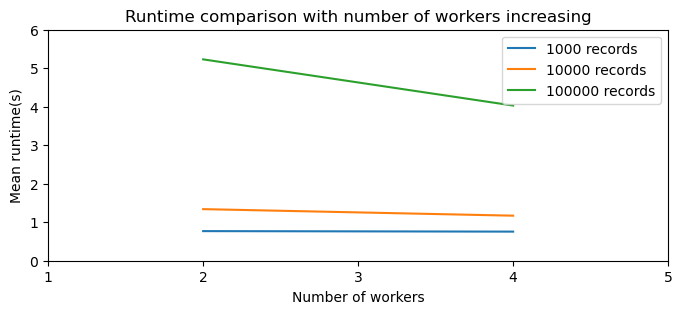

In [32]:
import matplotlib.pyplot as plt

#Runtime comparison with workers increasing
x = [2,4]
y1 = [0.769,0.756]
y2 = [1.34,1.17]
y3 = [5.23,4.03]

plt.figure(figsize=(8,3))
plt.plot(x,y1,label='1000 records')
plt.plot(x,y2,label='10000 records')
plt.plot(x,y3,label='100000 records')
plt.legend(loc='upper right') 
plt.xlabel('Number of workers')
plt.ylabel('Mean runtime(s)')
plt.title('Runtime comparison with number of workers increasing')

plt.xticks(range(6),[0,1,2,3,4,5])
plt.axis([1, 5, 0, 6])
plt.tick_params(axis='both', labelsize=10)
plt.show()


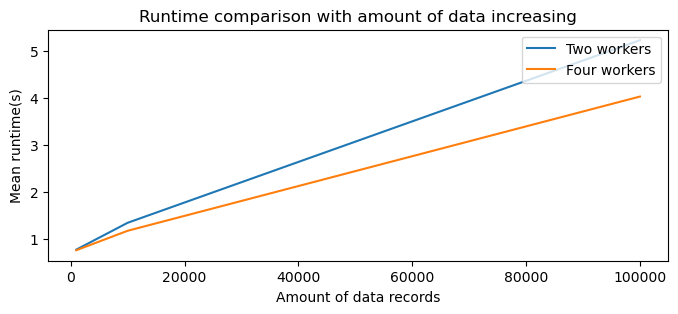

In [34]:
import matplotlib.pyplot as plt

#Runtime comparison with amount of data increasing
x = [1000,10000,100000]
y1 = [0.769,1.34,5.23]
y2 = [0.756,1.17,4.03]


plt.figure(figsize=(8,3))
plt.plot(x,y1,label='Two workers')
plt.plot(x,y2,label='Four workers')
plt.legend(loc='upper right') 
plt.xlabel('Amount of data records')
plt.ylabel('Mean runtime(s)')
plt.title('Runtime comparison with amount of data increasing')
#plt.xticks(range(3),[1000,10000,100000])
plt.show()


# Stop spark session

In [44]:
spark_session.stop() 